In [138]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm, det, eig, solve, matrix_rank

# Матрицы

## 1. Базовая информация
Матрицы в общем случае это опрераторы, которые переводят элемент из пространства одной размерности в пространство другой размерности, например матрица $A (m\times n)$ переводит элемент $x(n, 1)$ в элемент $y(m, 1)$: $A(m, n) \times x(n, 1) = y(m, 1)$.

Для создания матриц в `python` сужествуют несколько вариантов:
1. Нулевая матрица: `np.zeros((3, 4))`
2. Единичная матрица: `np.ones((3, 4))`
3. Квадратная диагональная единичная матрица: `np.eye(3, dtype=float)`
4. Матрица с произвольными значениями: `np.array([[1, 2, 3], [4, 5, 6]])`

In [139]:
# как дополнительный пример создания матрицы
np.arange(1, 7, 1).reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

## 2. Основные типы матриц

**Диагональная матрица**: это матрица, у которой все элементы кроме тех что на диагонали равны 0.

Диагональная матрица задает соответственно растяжение-сжатие фигуры до преобразования вдоль соответствующих осей на значение элемента на диагонали.

<img src='img/matrix_ortogonal.png'/>

**Ортогональная матрица**: это матрица, для которой выполено условие: $AA^{T}=A^{T}A=I$.

Из определения сразу вытекает ряд свойств:
1. Ортогональная матрица обратима, причем $A^{-1}=A$
2. Орторональная матрица сохраняет скалярное произведение:
$$
    (Ax, Ay) = (Ax)^{T} (Ay)=x^{T}A^{T}Ay=x^{T}y=(x,y)
$$
3. Ортогональная матрица сохраняет длины векторов, так как сохраняется и скалярное произведение.

Ортогональная матрица задает соответственно вращение фигуры.

<img src='img/matrix_diagonal.png'/>

**Симметричная матрица**: матрица в  которой все элементы симметричны относительно главной диагонали.

**Теорема**: Любую симметричную матрицу $A$ можно представить в виде $A=Q\times D \times Q^{T}$, где $Q$ - ортогональная матрица, а $D$ - диагональная матрица.

Поэтому, симметричная матрица задает растяжение (как диагональная матрица) и поворот (как ортогональная матрица).

<img src='img/matrix_symmetrical.png'/>

## 3. Определитель матрицы и ранг

Очень выжным понятием для матрицы является определеитель

**Опр**: Определитель матрицы это выражение, которое для квадратной матрицы $A(2, 2)$ принимает вид (ограничимся только таким определением) (вычисляется с использованием `numpy.linalg.det`):

$$
    det A = a_{11}a_{22} - a_{12}a_{21}
$$

**Смысл определителя**: показывает объем $N$-метроно паралепипида, заданного матрицей $A$, те. $S = |det A|$.

Таким образом, определитель матрицы $A$ показывает как *количественно изменится площадь фигуры после преобразования этой фигуры при помощи выбранной матрицы $A$*.

Например, при преобразовании единичного квадрата, построенного на векторах `x=[0, 1].T` и `y=[1, 0].T` с помощью матрицы `A = [[1, 2], [3, 1]]` получим параллелограмм с площадью $S=5$, что говорит о том, что площадь единичного квадрата увеличилась в 5 раз. 
Докажем что это верно ниже:

In [140]:
x = np.array([0, 1, 1, 0]).reshape((2, 2))
A = np.array([1, 2, 3, 1]).reshape((2, 2))

y = A.dot(x)
angle =  np.arccos(np.dot(y[0, :], y[1, :]) / norm(y[0, :], ord=2) / norm(y[1, :], ord=2))
S_real = norm(y[0, :], ord=2) * norm(y[1, :], ord=2) * np.sin(angle)
S_det = np.abs(det(A))

print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_real, 3)))
print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_det, 3)))

Площадь после преобразования через школьную формулу: 5.0
Площадь после преобразования через школьную формулу: 5.0


**Некоторые свойства определителя**:
1. Определитель матрицы, содержащей линейно зависимые строки равен нулю. (в друхмерном пространстве это два вектора, лежащих на одной прямой - ясно что площадь такого параллелограмма будет равна нулю).

In [141]:
A = np.array([[1, 2, 3], [2, 5, 1], [2, 4, 6]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A с двумя линейно зависимыми векторами: {0}'.format(det(A)))

Определитель матрицы A с двумя линейно зависимыми векторами: 0.0


2. Определитель матрицы не меняется при транспонировании, те. `det A = det A.T`

In [142]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A   : {0}'.format(round(det(A), 3)))
print('Определитель матрицы A.T : {0}'.format(round(det(A.T), 3)))

Определитель матрицы A   : 10.0
Определитель матрицы A.T : 10.0


3. Если $A$ и $B$ квадратные матрицы одного размера, то $det(A\times B) = det(a)\times det(B)$.

In [143]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
B = np.array([[1, 5, 3], [2, 1, 1], [1, 2, 3]]).reshape((3, 3))

print('det(AB)       = {0}'.format(round(det(A.dot(B)), 3)))
print('det(A)*det(B) = {0}'.format(round(det(A)*det(B), 3)))

det(AB)       = -150.0
det(A)*det(B) = -150.0


Важным параметром, харрактеризующим количество инфорации в матрице является ее ранг.

**Опр.** Рангом матрицы $A$ называется максимально возможное число ЛН строк или стобцов (есть теорема что число ЛН строк равное числу ЛН столбцов).

В `python` вычисление ранга матрицы происходит при помощи `numpy.linalg.matrix_rank`.


## 4. Собственные вектора и значения

Важной харрактеристикой матрицы, или же преобразования, задаваемого ее матрицей являются - Собственные Вектора (`СВ`) и Собственные Значения (`СЗ`). Они будут использоваться нами далее в Методе Главных Компонент при отборе значимых признаков (уменьшение размерности данных с минимальной потерей информации).

**Опр.** СВ матрица $A$ будем называть, вектора $x$, удовлетворяющие $Ax = \lambda x$, где $\lambda$ некоторое действительное число.

Из определения видно, что при действии оператора $A$ на СВ $x$ **не происходит изменение направления вектора**, только его растяжение или сжатие.
Это и является особенной харрактеристикой СВ. 

Рассмотрим это на примере (*аналитическое решение в img*):

In [144]:
A = np.array([-4, 6, -3, 5]).reshape((2, 2))
eig_vals, eig_vec = eig(A)

print('СЗ: {0}'.format(eig_vals))
print('CB:\n {0}'.format(eig_vec))

СЗ: [-1.  2.]
CB:
 [[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]


Построим для данной матрицы:
1. `СВ` и применим к нему преобразование $A$
2. `не СВ` и применим к нему преобразование $A$

Изучим их взаимное положение на рисунке ниже:

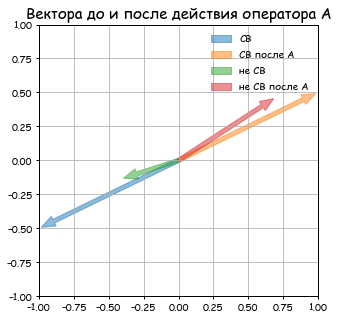

In [145]:
%run ./plot.py eigen

Как видно из рисунка, `СВ` не поменял направление, в то время как `не СВ` координального его изменил.

Не у каждой матрицы существую собственные вектора, например у ортогональной матрицы поворота (что логично, так как она задает число вращение). *Замечание: есть только для углов $0, \pi$*

В примере ниже для угла $\pi/3$ мы видем что собственные значения комплексные - значит решить задачу не удалось.

In [146]:
alpha = np.pi/3.

A = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]
])

eig_val, eig_vec = eig(A)

print('СЗ: {0}'.format(eig_val))

СЗ: [0.5+0.8660254j 0.5-0.8660254j]


## Системы линейных уравнений



Системы линейных уравнений записываются в общем виде как: $Ax=b$, где $x, b$ - векторы, $A$ - некоторая матрица.

Система линейных уравнений может иметь:
1. Одно решение
2. Бесконечно много решений
3. Не иметь решений - такая система называется несовместной

**Теорема Кронкера-Каппели**: Система линейных уравнений $Ax=b$ совместна, если ранг оснонвной матрицы $A$ равен рангу расширенной матрицы $(A|b)$. Причем система имеет единственное решение если ранг матрицы равен числу неизвестных и имеет бесконечно много решений, если ранг меньше числа неизвестных.

Системы линейных уравений решаются в `python` при помощи `numpy.linalg.solve`.

Пример системы, которая не имеет решений:

In [147]:
A = np.ones((2, 2))
b = np.array([1, -1])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
except Exception as e:
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('Error: {0}'.format(str(e)))

rank A = 1
rank (A|b) = 2
Error: Singular matrix


Пример системы, которая имеет одно решение:

In [148]:
A = np.array([1, 2, 1, 1]).reshape((2, 2))
b = np.array([5, 3])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('x = {0}'.format(x))
except Exception as e:
    print('Error: {0}'.format(str(e)))

rank A = 2
rank (A|b) = 2
x = [1. 2.]


Пример системы, которая имеет бесконечно много решений:

In [149]:
A = np.array([1, 1, 2, 2]).reshape((2, 2))
b = np.array([2, 4])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
except Exception as e:
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('Error: {0}'.format(str(e)))

rank A = 1
rank (A|b) = 1
Error: Singular matrix


# Разложение матрицы

Cуществует несколько способов разложения матрицы, но точно можно утверждать что можно разложить любую матрицу $X$ на две матрицы $U$ и $V$ так, что $X=U V^{T}$.


**Спектральное разложение**:
как оговаривалось ранее, любую симметричную матрицу можно представить в виде $A=QDQ^{T}$, где $Q$ - ортогональная матрица и $D$ - диагональная матрица, у которой собственные значения $\lambda_{i} \; i=0\dots n$ на диагонали.



## Сингулярное разложение

**Опр** Сингулярное разложение матрицы $A$ - это разложение матрицы в виде $A=UDV^{T}$, где $U, V$ - ортогональные матрицы (которые состоят из СВ матриц AA* и A\*A соответственно) и $D$ - диагональная матрица с сингулярными СЗ матрицы $A$ на диагонали, которые отранжированы $\sigma_{1} > \sigma_{2} \dots > \sigma_{n}$


Причем: матрица $A$ имеет размер (m,n), матрица $U$ размер (m,m), $V$ размер (n,n) и $D$ - размер (m,n).

В `python` для применения сингулярного разложения матрицы исмпользуется функция `numpy.linalg.svd`.


In [150]:
from numpy.linalg import svd
A = np.array([
    [3, 1, 4, 2, 5],
    [2, 0, 2, 2, 4],
    [1, 1, 1, 0, 1]
], dtype=float)

print(A)

U, D, Vt = svd(A)

[[3. 1. 4. 2. 5.]
 [2. 0. 2. 2. 4.]
 [1. 1. 1. 0. 1.]]


## Приближение матрицы меньшей по рангу

Иногда в данных может быть **много шума** что делает матрицу очень сложной (что харрактеризуется ее рангом), но мы знаем о наличии этих шумов, и поэтому хотим упростить матрицу $A$ - то есть заменить ее более простой (матрицей меньшего ранга) матрицей $\hat{A}$, *близкой* к матрице $A$.

P.S. как мы помним сложность матрицы определяется ее рангом, поэтому ранга матрицы приведет к удалению посторонних шумов.

**Как определить близость матриц?** - *введем понятие нормы!*

**Опр.** Нормой Фробениуса матрицы $A$ называется такое число $||A||_{F}$, которое вычисляется согласно выражению: $||A||_{F}=\sqrt{\sum_{i,j}a_{i,j}^{2}}$.


Норму можно вычислить с помощью `python` используя `numpy.linalg.norm`.

In [151]:
print('Норма матрицы А = {0}'.format(round(norm(A), 2)))

Норма матрицы А = 9.33


Тогда, задача приближения матрицы $A$ матрицей $\hat{A}$ меньшего ранга выглядит следующим образом: *найти оценку матрицы $A$ в виде матрицы $\hat{A}$ ранга $k$ меньшего чем у матрицы $A$ так, что $||A-\hat{A}||_{F}\to min$*.

**Теорема.** Матрица, полученная сингулярным разложением матрицы $A$, в котором у диагональной матрицы $D$ остались только $k$ первых (максимальных) сингулярных значений является наилучшим приближением матрицы $A$ матрицой меньшего ранга $k$ по норме Фробениуса.

<img src='img/svd.png'>

**Пример**: рассмотрим как можно приблизить матрицу A (ранг 3) матрицей меньшего ранга 2.

In [152]:
n_comp = 2
A_hat = U[:, :n_comp].dot(np.diag(D[:n_comp]).dot(Vt[:n_comp, :]))

print('Ранг матрицы A = {0}'.format(matrix_rank(A)))
print('Ранг приближенной матрицы A_hat = {0}'.format(matrix_rank(A_hat)))
print('Норма разности: {0}\n'.format(round(norm(A-A_hat), 2)))

print(A_hat)

Ранг матрицы A = 3
Ранг приближенной матрицы A_hat = 2
Норма разности: 0.45

[[ 3.08320529  1.09895997  3.82322967  1.98424533  5.06745062]
 [ 1.91931585 -0.09596145  2.17141413  2.0152773   3.93459316]
 [ 0.88512254  0.86337083  1.24405812  0.02175171  0.90687424]]


P.S. Стоит отметить что понижение ранга **никак не сказывается на размерности матрицы**.

## Понижение размерности

Но обычно говорят вместо приближения матрицей $\hat{A}$ - приближение матрицей $UV^{T}$, и мы далее будем говорить так же.

Учитывая выше сказанное, если матрицу $U$ представить в виде $UD$ (m, k) из сингулярного разложения с $k$ компонентами, то ее можно назвать **матрицей новых признаков**, так как число строк не поменялось (число объектов в выборке) а число признаков уменьшилось с $n$ до $k$ - то есть мы **понизили размерность данных** (это и и спользуется в методе опорных векторов).

Понижение размерности в `python` можно выполнить при помощи `sklearn.decomposition.TruncatedSVD`. 

**Пример**: понижение размерности для датасета `iris`.

In [153]:
import sklearn
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
print('Размерность данных = {0}'.format(X.shape))

Размерность данных = (150, 4)


Попытаемся понизить размерность исходных данныз до двух для дальнейшей визуализации.
То есть, после понижения у нас вместо четырех признаков будет два.

Найдем матрицу пониженной размерности с использованием встроенной функциии `TruncatedSVD`.

In [154]:
from sklearn.decomposition import TruncatedSVD

dim = TruncatedSVD(n_components=2, random_state=2)
dim.fit(X)

X_hat = dim.transform(X)
print(dim.singular_values_)
print('Размерность данных = {0}'.format(X_hat.shape))

[95.95991387 17.76103366]
Размерность данных = (150, 2)


Построим распределение данных в пониженной размерности. 
Теперь оно легко визуализируется на плоскости.

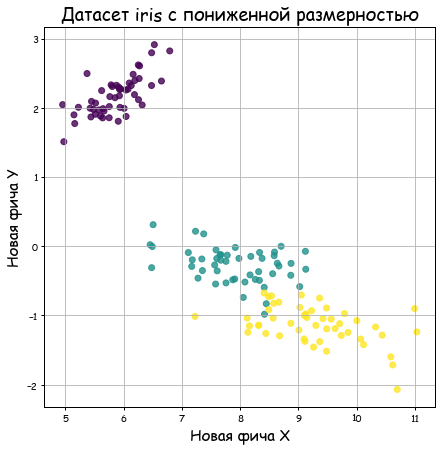

In [155]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_hat[:, 0], X_hat[:, 1], c=data.target, alpha=0.8)
ax.set_title('Датасет iris с пониженной размерностью', fontsize=18)
ax.set_xlabel('Новая фича X', fontsize=15); ax.set_ylabel('Новая фича Y', fontsize=15)
ax.grid(True)
plt.show()

Но как мы и говорили ранее матрицу $UD$ (m, k) можно так-же считать новой матрицой признаков. 
Попробуем понизить размерность того-же датасета `iris` но только прямо с использованием сингулярного разложения.

In [156]:
U, D, Vt = svd(X)
n_comp = 2
X_hat1 = U[:, :n_comp].dot(np.diag(D[:n_comp]))
print('Размерность данных = {0}'.format(X_hat1.shape))

Размерность данных = (150, 2)


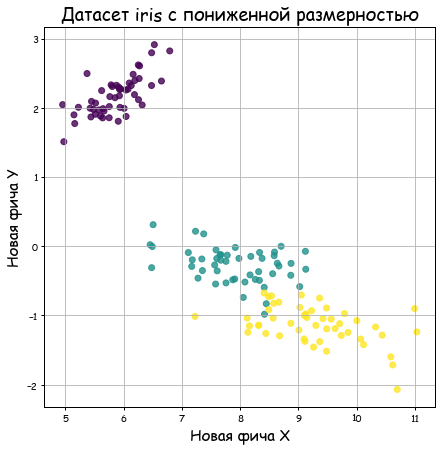

In [157]:
fig, ax = plt.subplots(figsize=(7, 7))
# Pay attentions to sign
ax.scatter(-X_hat1[:, 0], X_hat1[:, 1], c=data.target, alpha=0.8)
ax.set_title('Датасет iris с пониженной размерностью', fontsize=18)
ax.set_xlabel('Новая фича X', fontsize=15); ax.set_ylabel('Новая фича Y', fontsize=15)
ax.grid(True)
plt.show()

**Вывод**: функция `TruncatedSVD` в первом приближении выполняет обычное сингулярное разложение (в точности до знака, см. минус при построении `scatter`).

P.S. можно было по СЗ понять что для построения классификации по датасету `iris` на самом деле было достаточно 2 размерностей. Первые два много больше остиальных.

In [158]:
print('CЗ при SVD разложении: {0}'.format(np.round(D, 2)))
print('CЗ оставшиеся после понижения размерности: {0}'.format(np.round(dim.singular_values_, 2)))

CЗ при SVD разложении: [95.96 17.76  3.46  1.88]
CЗ оставшиеся после понижения размерности: [95.96 17.76]


## Рекомендательные системы

СМ. [Рекомендательные системы](https://habr.com/ru/company/surfingbird/blog/139863/)

Задача рекомендательных систем - спрогнозировать какой продукт понравится пользователю по имеющимсчя данным о предпочтениях пользователя. Например, спрогнозировать какую оценку пользователь поставит фильму.

Составим матрицу оценок пользователей $X$ у которой харрактеризуют *пользователя* (оценки одного пользователя), столбцы харрактеризуют предлагаемые *фильмы* (оценки всех пользователей конкретным фидьмам).

### Решение 1

Можно решать эту задачу так - найти *"соседей"* выбранного пользователя (максимально близких к нему, например в рамках косинусного расстояния) а потом спрогнозировать оценку пользователя на каждый фильм, посчитав ее как взвешанную сумму оценок ближайших пользователей, с весами - это *"удаленность"* от выбранного пользователя.

### Решение 2

**Идея**: научить алгоритм мыслить категриями фильмов, которые могут понравиться пользователю, и рекомендовать именно эти категории (а не просто по похожим предпочтениям).

Для этого идеально подходит SVD разложение матрицы $X$, в котором выделено в некотором роде $k$-**жанров**, и соответственно матрица $UD$ (m, k) - описывает **какие жанры нравятся пользователю**, а матрица $V^{T}$ описывает из каких жнров этот фильм состоит.

P.S. под жанрами я понимаю нечно абстрактное, и не всегда интерпретируемое, например при понижении размерности может возникнуть жанр: "боевик, в котором много красивых видов и интересный сюжет". Это будет один из $k$ так называемых жанров.

Кроме того, понижение размерности очень хорошо тут применимо, так как матрица $X$ - разряженная матрица, так как редко какой пользователь оценивает все фильмы.
